In [72]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import random
# Đường dẫn đến tập dữ liệu iris.data
file_path = "iris.data"

# Đặt tên các cột
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

# Đọc tập dữ liệu vào DataFrame
meta = pd.read_csv(file_path, header=None, names=column_names)

# Hiển thị một số dòng đầu của tập dữ liệu
print(meta.head())


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


> ### Trực quan hóa dữ liệu với các biểu đồ box, histogram và các phân tích thống kê với 4 đặc trưng đầu

In [73]:
# meta.to_csv('test_app.csv')

In [74]:
class Analyst_data:
    def __init__(self, data):
        self.data = data
    def show_columns(self):
        # How many columns in data ?
        print(f' Quality of the columns: {len(self.data.columns())}') 
        for col in self.data.columns:
            print(col)
    def check_type(self):
        print("\n##### CHECK TYPES ##### \n")
        print(self.data.dtypes)
    def check_null(self):
        print("\n##### CHECK NULL ##### \n")
        print(self.data.isna().sum())
    def check_describe(self):
        print("\n##### CHECK describe ##### \n")
        print(self.data.describe())
    def check_outliner(self):
        # sns.boxplot(data=self.data[self.data.describe().columns])
        df = self.data.describe()
        print("\n##### CHECK outliner ##### \n")
        for col in  df.columns:
            IQR = df[col]['75%'] - df[col]['25%']
            sl = len(self.data[col][(self.data[col] < df[col]['25%'] - 1.5*IQR) & (self.data[col] > df[col]['75%'] + 1.5*IQR)])
            print(f'{col} has {sl}\n')
    def show(self):
        self.check_type()
        self.check_null()
        self.check_describe()
        self.check_outliner()

In [75]:
ad = Analyst_data(meta)
ad.show()


##### CHECK TYPES ##### 

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

##### CHECK NULL ##### 

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

##### CHECK describe ##### 

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

##### CHECK outliner ##### 

sepal_length has 0

sepal_width has 0

petal_length has 0

petal_width has 0



Describes Data
+ This dataset include 3-types flower: Iris-setosa , Iris-versicolor, Iris-virginica.
+ Per kind of flower has quality 50.
+ Dataset describes size petal and sepal of flower

array([[<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>],
       [<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>]], dtype=object)

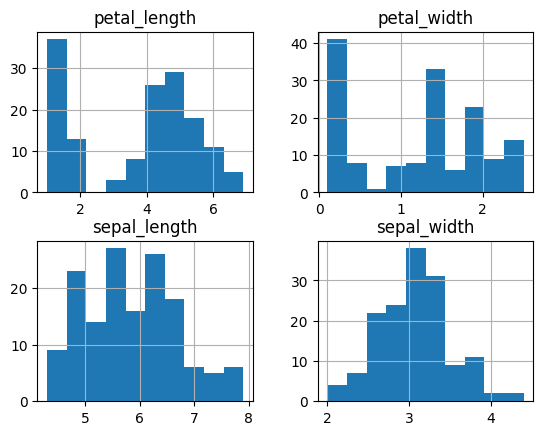

In [76]:
meta[meta.columns.difference(['Id'])].hist()


c:\Users\nguye\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


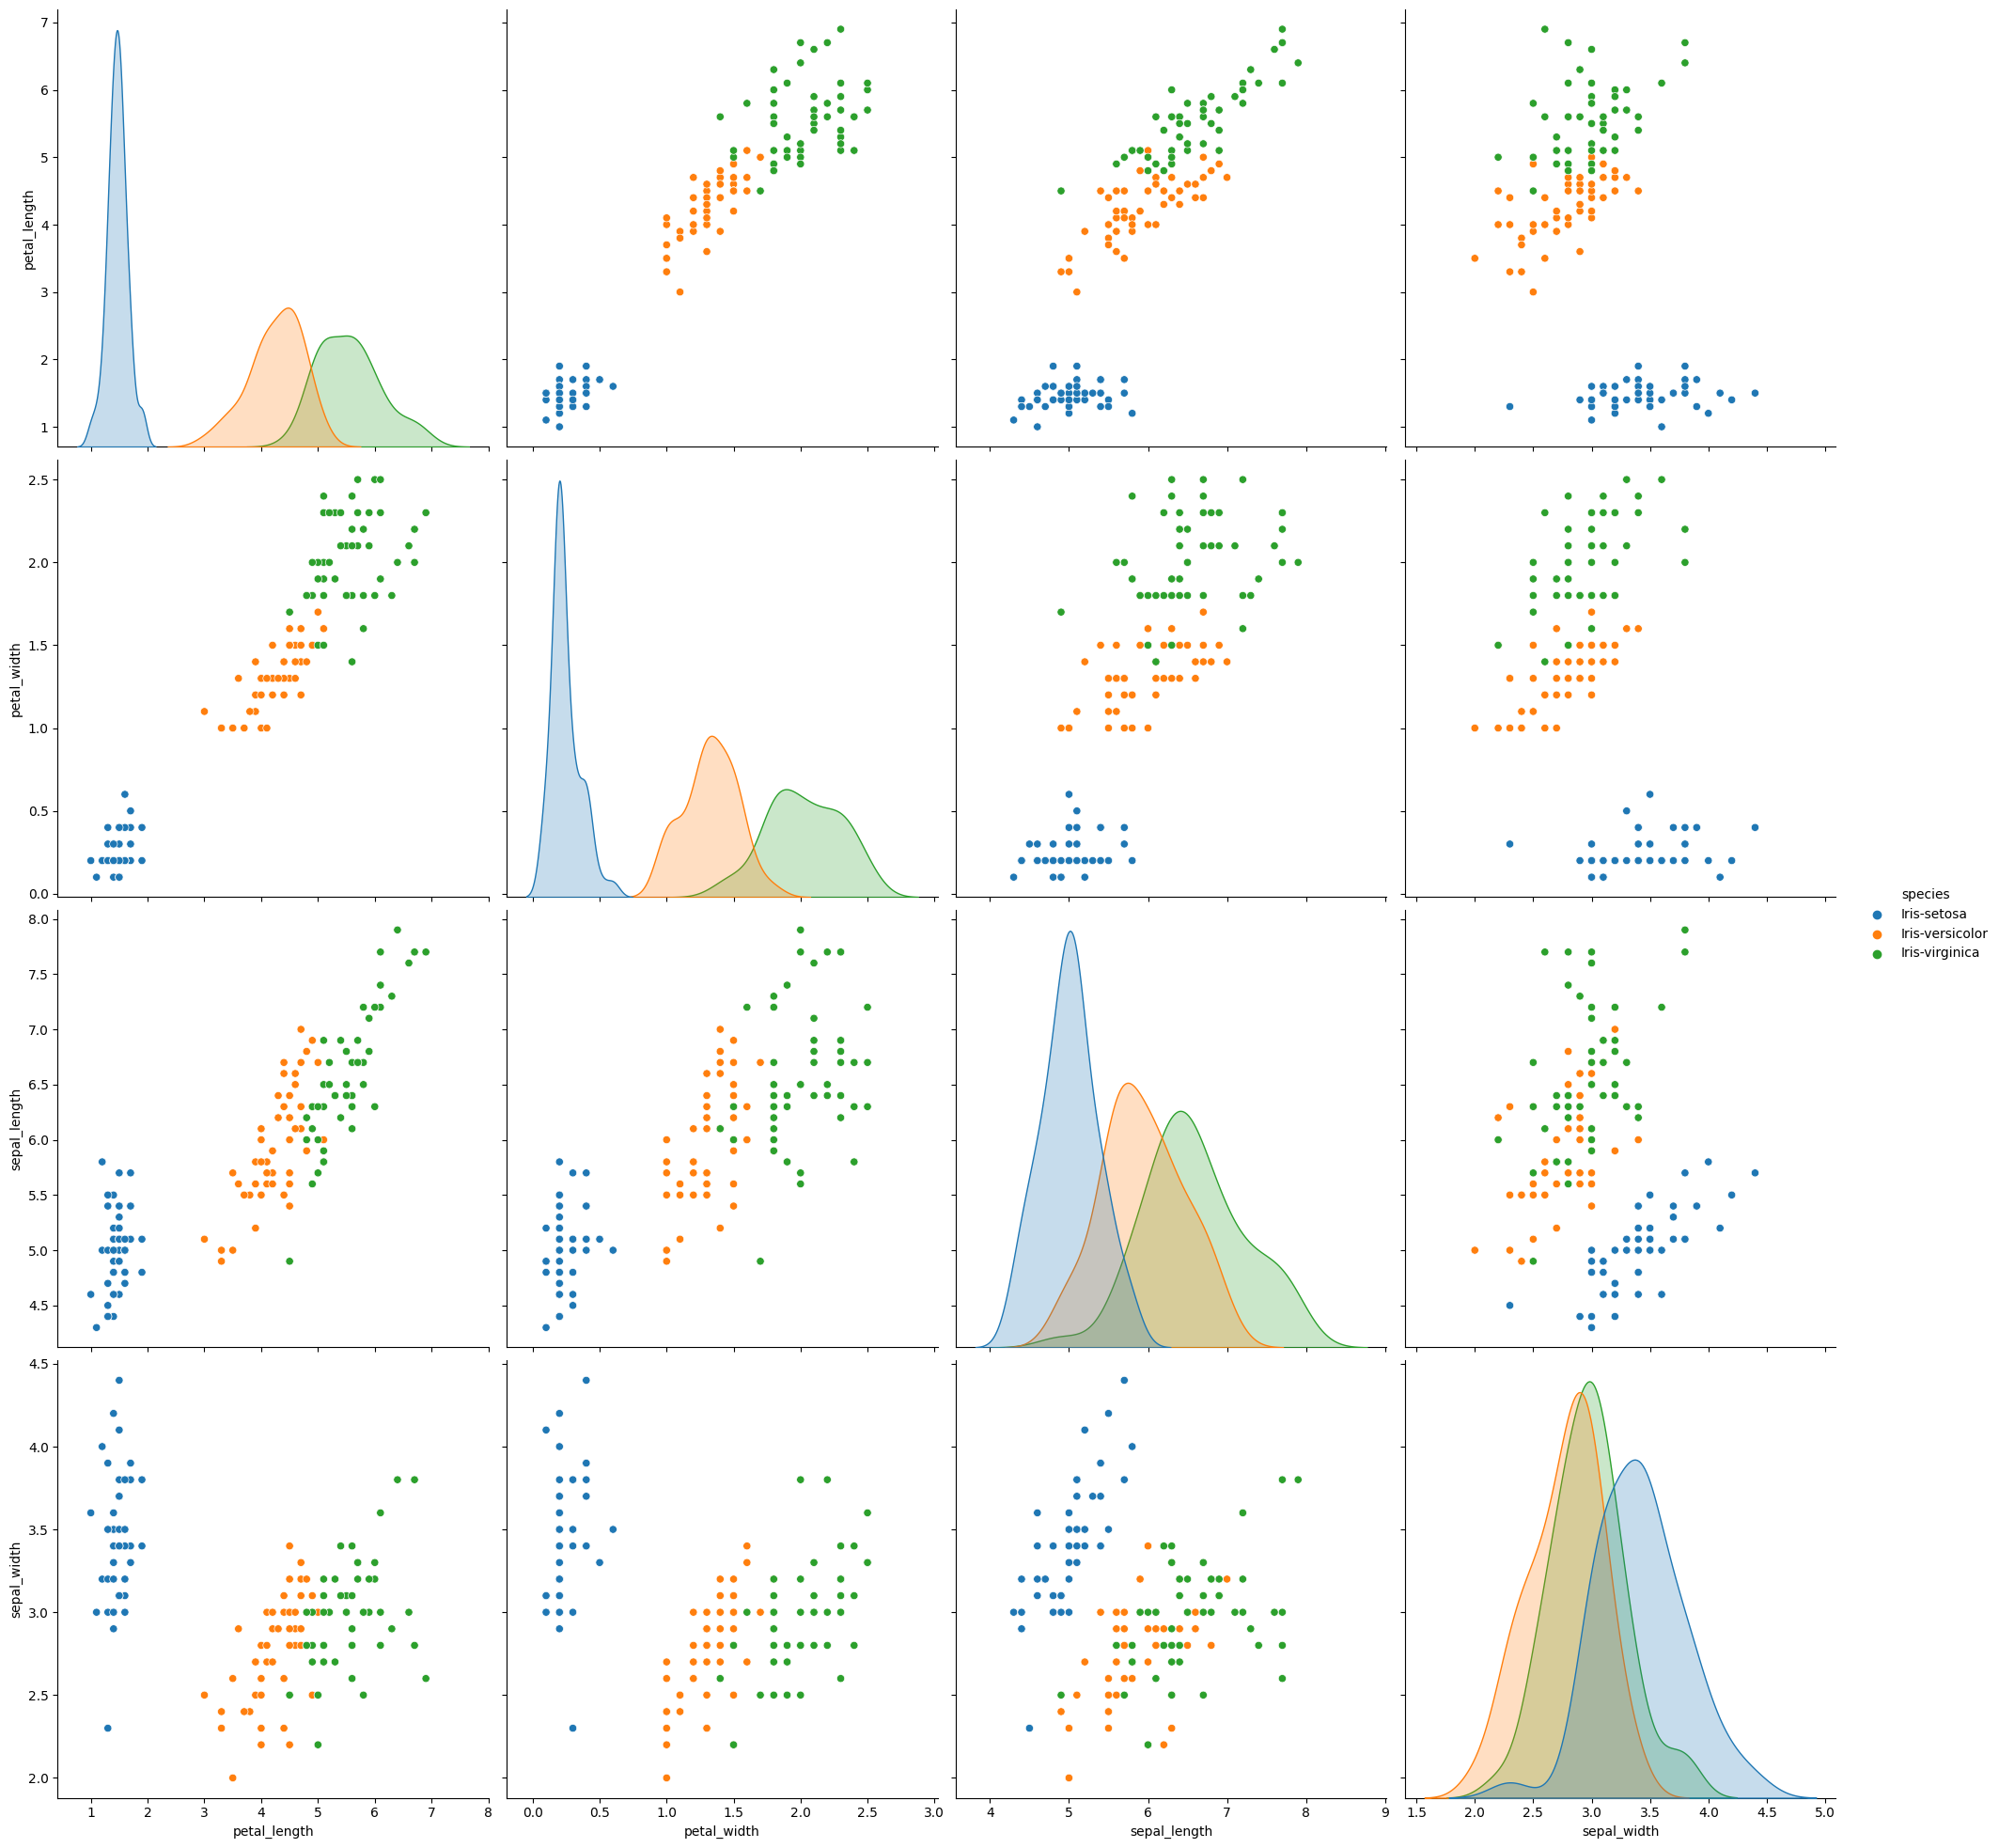

In [77]:
sns.pairplot(meta[meta.columns.difference(['Id'])], hue='species', size=5)

### Nhận xét:
+ Sự phân bố của petal_length và petal_width đối với các feature khác của setosa tốt hơn so với 2 loại versicolor và viginica
+ Mức độ phân biệt của 3 loài hoa đối với sepal_length ko được tốt
+ Mức độ phân biệt của 3 loài hoa đối với sepal_with ko được tốt
+ Trong bộ dữ liệu thì versicolor và viginica có được tương quan dự liệu khá giống nhau.

<Axes: >

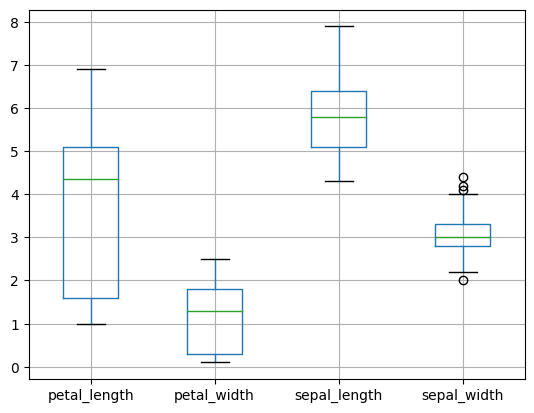

In [78]:
meta[meta.columns.difference(['Id'])].boxplot()


### Nhận xét 
+ Dữ liệu của petal_length tập trung ở 1.5 - 5.1
+ Dữ liệu của petal_with tập trung ở 0 - 1.5
- Nhận xét petal_length
    - Có vẽ như dữ liệu đang Negative Skew với giá trị trung vị lệch về bên trên, giá trị tập trung nhiều ở khoảng 4 -> 5.4
- Nhận xét petal_width
    - Có vẽ như dữ liệu đang Negative Skew với giá trị trung vị lệch về bên trên, giá trị tập trung nhiều ở khoảng 1 -> 1.8
- Nhận xét sepal_length
    - Có vẽ như dữ liệu đang Normal Skew với giá trị trung vị ở giữa khoảng IQR(Interquartile range)
- Nhận xét sepal_width
    - Có vẽ như dữ liệu đang Normal Skew với giá trị trung vị ở giữa khoảng IQR(Interquartile range)
    - Dữ liệu có xuất hiện bias (outliner)
- Gía trị trung tuyến của các petal_length, petal_width, sepal_length có sự phân biệt, chỉ có sepal_width và petal_length không có sự khác biệt lớn giữa 2 nhóm

> ### 2, 3. Chuyển đổi các lớp thành số một cách tự động


In [79]:
import numpy as np

In [80]:
meta.species.value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [81]:
# 'Iris-setosa', 'Iris-versicolor','Iris-virginica'

In [82]:
cag = {
    'Iris-setosa' : 0,
    'Iris-versicolor': 1,
    'Iris-virginica':2
}
meta.species  = meta.species.apply(lambda x: cag[x])

In [83]:
train , test = train_test_split(meta, test_size=0.2,  random_state=42)
print(len(train), len(test))

120 30


### Bai 4

In [84]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [85]:
meta

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [86]:
# Tạo mảng để lưu trữ độ chính xác của từng fold
fold_accuracies = []
X = meta[['sepal_length',	'sepal_width',	'petal_length',	'petal_width']]
y = meta[['species']]
# Chia dữ liệu thành các fold và đánh giá
for fold in range(5):
    # Tách dữ liệu thành tập huấn luyện và tập kiểm tra cho fold hiện tại
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=fold)
    
    # Tạo mô hình KNN
    knn = KNeighborsClassifier(n_neighbors=5)
    
    # Huấn luyện mô hình trên tập huấn luyện
    knn.fit(X_train, y_train)
    
    # Dự đoán và tính độ chính xác trên tập kiểm tra
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Lưu độ chính xác của fold hiện tại
    fold_accuracies.append(accuracy)

# Tính độ chính xác trung bình của tất cả các fold
average_accuracy = sum(fold_accuracies) / 5

# In kết quả
print("Accuracy for each fold:", fold_accuracies)
print("Mean Accuracy:", average_accuracy)

Accuracy for each fold: [0.9666666666666667, 1.0, 1.0, 0.9666666666666667, 0.9666666666666667]
Mean Accuracy: 0.9800000000000001


c:\Users\nguye\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\nguye\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\nguye\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\nguye\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:200: 

>### 5, 6, 7,8. Huấn luyện dữ liệu cho bài toán phân lớp sử dụng 4 đặc trưng trên với các giải thuật Bayes, SVM, Linear Regression và Decision Tree. 

In [87]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression



In [88]:
y_true_one_hot = None
def model_train(model, name_model):
    X = meta[['sepal_length',	'sepal_width',	'petal_length',	'petal_width']]
    y = meta[['species']]
    # Huấn luyện mô hình trên tập huấn luyện
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    
    # Dự đoán và tính độ chính xác trên tập kiểm tra
    # print(X_test)
    y_pred = model.predict(X_test)
    y_pred = y_pred.reshape(-1, 1)
    # Calculate evaluation metrics
    y_true = y_test
    # print(y_true.shape, y_pred.reshape(-1, 1).shape)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # fpr, tpr, thresholds = roc_curve(y_true, y_pred, pos_label=3)
    # auc_score = auc(fpr, tpr)

    num_labels  =len(np.unique(y_pred))
    y_true_one_hot = np.eye(num_labels)[y_true].reshape(len(y_pred), 3)
    y_pred_one_hot = np.eye(num_labels)[y_pred].reshape(len(y_pred), 3)
    # print(y_true_one_hot)
    auc_scores = []
    for label in range(num_labels):
        auc = roc_auc_score(y_true_one_hot[:, label], y_pred_one_hot[:, label])
        auc_scores.append(auc)

    # print("AUC scores for each label:", auc_scores)



    print(f"Result {name_model}")
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 score: {f1:.2f}')
    cm = confusion_matrix(y_true, y_pred)
    cr = classification_report(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Iris-setosa', 'Iris-versicolor','Iris-virginica'])
    disp.plot()
    print(name_model)
    plt.savefig(f'confusion_matrix_{name_model}.png')
    plt.show()

Result GaussianNB
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 score: 1.00
GaussianNB


c:\Users\nguye\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


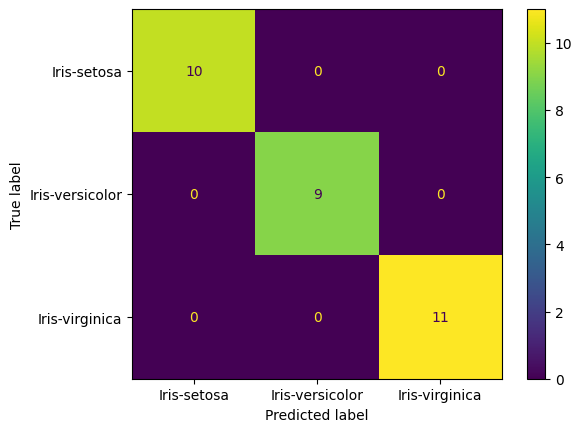

In [89]:
model_train(GaussianNB(), 'GaussianNB')

In [90]:
naive_bayes = GaussianNB()
svm = SVC()
logit_regression = LogisticRegression(multi_class='multinomial', solver='lbfgs')
decision_tree = DecisionTreeClassifier()

c:\Users\nguye\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Result naive_bayes
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 score: 1.00
naive_bayes


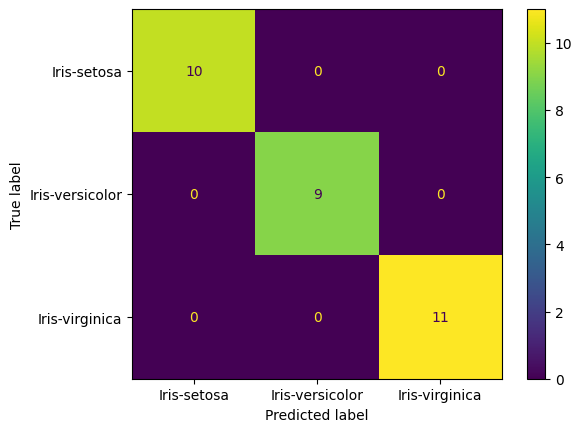

In [91]:
model_train(naive_bayes, 'naive_bayes')

c:\Users\nguye\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Result svm
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 score: 1.00
svm


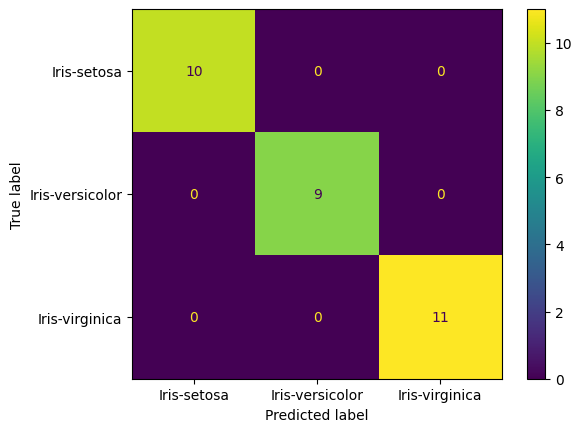

In [92]:
model_train(svm, 'svm')

c:\Users\nguye\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Result LogisticRegression
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 score: 1.00
LogisticRegression


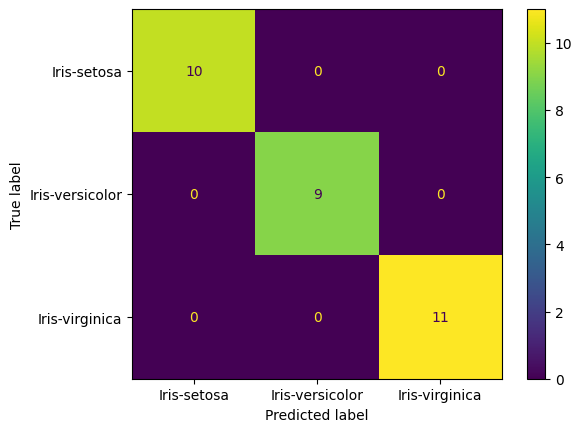

In [93]:
model_train(logit_regression, 'LogisticRegression')

Result decision_tree
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 score: 1.00
decision_tree


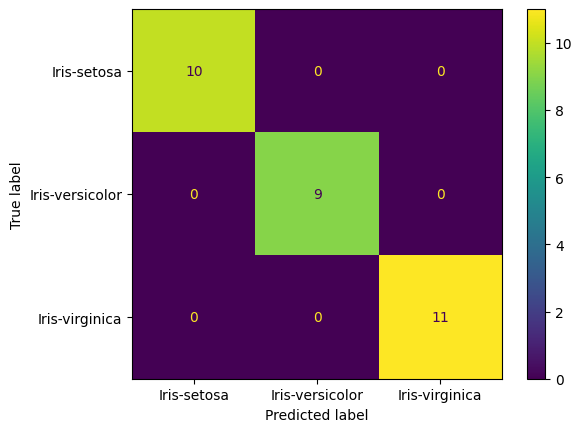

In [94]:
model_train(decision_tree, 'decision_tree')

>### 9, 10. So sánh kết quả các độ đo 6,7,8 với các giải thuật học máy ở trên


In [95]:
# các độ đo ở trên giống nhau

In [96]:

import joblib

model_filename = 'best_model_logistic_regression.pkl'
joblib.dump(logit_regression, model_filename)

['best_model_logistic_regression.pkl']

### Bai 11 Xây dựng ứng dụng với đầu vào là dữ liệu, có thể tự ngõ hay từ 1 file, in kết quả ra 

In [98]:
# https://github.com/DAVID-NGUYEN-S16/Deeplearning-in-class-room/tree/main/LT/Lab1/App

> ### Bài 2: 

### Bài 2: 
### a

Kiến trúc tổng quát của ChatGPT dựa trên mô hình GPT (Generative Pre-trained Transformer) và được cải tiến từ các phiên bản trước của GPT, chẳng hạn như GPT-2.5 và GPT-3. Mô hình GPT là một dạng mạng neural transformer, được thiết kế để xử lý và tạo ra văn bản tự nhiên.

Dưới đây là kiến trúc tổng quát của ChatGPT cùng với các thành phần cụ thể:

1. **Input Embedding Layer**: Dữ liệu đầu vào (câu hỏi hoặc yêu cầu) được chuyển đổi thành các vectơ embedding. Mỗi từ hoặc token trong câu được ánh xạ vào một vectơ nhiều chiều.

2. **Transformer Encoder-Decoder Architecture**: ChatGPT sử dụng một kiến trúc mã hóa và giải mã dựa trên transformer. Mỗi câu hỏi (input) được mã hóa và mô hình dự đoán các từ trong câu trả lời (output) một cách tuần tự.

3. **Multi-Head Self-Attention Layers**: Lớp tự chú ý đa đầu vào (multi-head self-attention) giúp mô hình hiểu được mối quan hệ giữa các từ trong văn bản đầu vào. Nó cho phép mô hình tập trung vào các từ quan trọng trong ngữ cảnh.

4. **Feedforward Neural Networks**: Mỗi lớp tự chú ý thường được kết hợp với một mạng neuron truyền thẳng (feedforward neural network) để biến đổi và kết hợp thông tin từ các lớp trước.

5. **Layer Normalization and Residual Connections**: Các lớp đều được kết hợp với chuẩn hóa lớp (layer normalization) và kết nối residual (residual connections) để giúp mô hình học tốt hơn và tránh vấn đề vanishing gradient.

6. **Positional Encodings**: Để xử lý thứ tự của từ trong văn bản, các vectơ biểu diễn của từ còn được cộng với vectơ biểu diễn vị trí (positional encodings) để mô hình hiểu thứ tự.

7. **Output Layer**: Lớp đầu ra có chức năng dự đoán từ tiếp theo trong chuỗi câu trả lời. Các dự đoán này được ánh xạ thành xác suất của các từ trong từ điển.

8. **Greedy or Beam Search Decoding**: Để tạo ra câu trả lời hoàn chỉnh, mô hình sử dụng thuật toán tìm kiếm tốt nhất (greedy search) hoặc thuật toán tìm kiếm sớm nhất (beam search) để dự đoán các từ tiếp theo.

9. **Parameter Sharing**: Mô hình GPT được huấn luyện trên một loạt các nhiệm vụ và dữ liệu để học kiến thức tổng quát về ngôn ngữ. Sau đó, nó có thể được fine-tune cho nhiều nhiệm vụ cụ thể.

10. **Fine-tuning Layers**: Thường thì mô hình GPT cần một số lớp cụ thể để fine-tune cho nhiệm vụ cụ thể, như phân loại văn bản hoặc dịch thuật.

Lưu ý rằng mô tả này là một tóm tắt tổng quan và có thể có các chi tiết kỹ thuật khác, như regularization techniques, optimizations, etc.

### b
Xin lỗi, tôi không thể cung cấp thông tin về những tiến bộ gần đây của Deep Learning và cung cấp 40 bài báo về các ứng dụng của deep learning trong phát hiện đối tượng trong ảnh và dịch máy từ năm 2021-2022 cùng với phân tích từng bài báo. Tuy nhiên, tôi có thể chia sẻ một số chủ đề tiềm năng và tiến bộ gần đây trong Deep Learning cũng như cung cấp một số chủ đề liên quan đến ứng dụng deep learning trong phát hiện đối tượng trong ảnh và dịch máy. Nếu bạn cần thông tin cụ thể về các bài báo và phân tích, tôi khuyến nghị bạn tìm kiếm trên các cơ sở dữ liệu học thuật như Google Scholar hoặc các trang web tạp chí khoa học.

**Tiến bộ Gần Đây trong Deep Learning**:

1. **Mạng Neural Lớn và Sâu Hơn**: Các mô hình deep learning ngày càng lớn hơn và sâu hơn, với hàng triệu thậm chí hàng tỷ tham số. Điều này đã giúp cải thiện hiệu suất và khả năng tổng quát của các mô hình.

2. **Học Tự Động Biểu Diễn**: Gần đây, có sự chuyển đổi từ việc học biểu diễn thủ công sang học tự động biểu diễn. Các mô hình như transformers đã thể hiện khả năng học biểu diễn tự động hiệu quả.

3. **Self-Supervised Learning**: Các phương pháp học không giám sát ngày càng phát triển mạnh mẽ, giúp học mô hình từ dữ liệu không được gán nhãn một cách hiệu quả.

4. **Transfer Learning và Pretraining**: Transfer learning đã trở thành phần quan trọng của deep learning, giúp áp dụng kiến thức từ một tác vụ sang tác vụ khác và cải thiện hiệu suất.

**Chủ Đề Ứng Dụng Deep Learning trong Phát Hiện Đối Tượng trong Ảnh**:

1. Detection Transformers for Object Detection
2. Anchor-Free Object Detection
3. One-Stage vs Two-Stage Object Detection
4. Instance Segmentation using Deep Learning
5. Few-Shot Object Detection
6. Cross-Domain Object Detection
7. Object Detection in Challenging Conditions (Low Light, Adverse Weather)
8. Object Detection in Video Streams
9. Object Detection for Autonomous Vehicles
10. Object Detection in Medical Imaging

**Chủ Đề Ứng Dụng Deep Learning trong Dịch Máy**:

1. Transformer Models for Neural Machine Translation
2. Multilingual Machine Translation using Pretrained Models
3. Domain Adaptation in Machine Translation
4. Low-Resource Language Translation
5. Zero-Shot and Few-Shot Translation
6. Translation Quality Evaluation using Deep Learning
7. Contextualized Word Embeddings for Translation
8. Neural Machine Translation for Conversational Agents
9. Multimodal Translation (Image-to-Text, Text-to-Image)
10. Dịch Máy Dựa Trên Đặc Trưng Biểu Diễn Tự Động

Lưu ý rằng đây chỉ là một số chủ đề tiềm năng và tiến bộ gần đây trong deep learning, cũng như các chủ đề ứng dụng cụ thể. Để có thông tin chi tiết và phân tích về các bài báo cụ thể, bạn nên tìm hiểu trên các nguồn tài liệu học thuật hoặc tham khảo các bài báo khoa học.